In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/Stroke.csv")

In [5]:
df.shape

(43400, 12)

In [6]:
df.columns.tolist()

['ID',
 'Gender',
 'Age',
 'Hypertension',
 'Heart_Disease',
 'Ever_Married',
 'Work_Type',
 'Residence_Type',
 'Avg_Glucose_Level',
 'BMI',
 'Smoking_Status',
 'Stroke']

In [7]:
df.dtypes

,0
ID,int64
Gender,object
Age,float64
Hypertension,int64
Heart_Disease,int64
Ever_Married,object
Work_Type,object
Residence_Type,object
Avg_Glucose_Level,float64
BMI,float64


In [8]:
df.head(3)

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,43400.0,36326.142350,21072.134879,1.00,18038.50,36351.50,54514.25,72943.00
Age,43400.0,42.217894,22.519649,0.08,24.00,44.00,60.00,82.00
Hypertension,43400.0,0.093571,0.291235,0.00,0.00,0.00,0.00,1.00
Heart_Disease,43400.0,0.047512,0.212733,0.00,0.00,0.00,0.00,1.00
Avg_Glucose_Level,43400.0,104.482750,43.111751,55.00,77.54,91.58,112.07,291.05
BMI,41938.0,28.605038,7.770020,10.10,23.20,27.70,32.90,97.60
Stroke,43400.0,0.018041,0.133103,0.00,0.00,0.00,0.00,1.00


In [10]:
df.isnull().sum()

,0
ID,0
Gender,0
Age,0
Hypertension,0
Heart_Disease,0
Ever_Married,0
Work_Type,0
Residence_Type,0
Avg_Glucose_Level,0
BMI,1462


In [11]:
df["ID"].unique()
df["ID"].value_counts().sum()

np.int64(43400)

In [12]:
df["Gender"].unique()
df["Gender"].value_counts()

,count
Gender,
Female,25665
Male,17724
Other,11


In [13]:
df["Age"].unique()
df["Age"].value_counts()

,count
Age,
51.00,738
52.00,721
53.00,701
78.00,698
50.00,694
...,...
0.48,37
0.40,35
1.00,34


In [14]:
df["Age"] = df["Age"].round().astype(int)

In [15]:
df["Age_Months"] = (df["Age"] * 12).round().astype(int)

In [16]:
df["Age"].value_counts()

,count
Age,
2,768
51,738
52,721
53,701
78,698
...,...
76,336
11,330
10,313


In [17]:
df["Hypertension"].value_counts()

,count
Hypertension,
0,39339
1,4061


In [19]:
df["Heart_Disease"].value_counts()

,count
Heart_Disease,
0,41338
1,2062


In [21]:
df["Ever_Married"].value_counts()

,count
Ever_Married,
Yes,27938
No,15462


In [22]:
df["Work_Type"].value_counts()

,count
Work_Type,
Private,24834
Self-employed,6793
children,6156
Govt_job,5440
Never_worked,177


In [23]:
df["Residence_Type"].value_counts()

,count
Residence_Type,
Urban,21756
Rural,21644


In [24]:
df["Avg_Glucose_Level"].value_counts()

,count
Avg_Glucose_Level,
82.71,19
72.53,18
87.07,18
83.92,17
84.40,17
...,...
164.02,1
108.55,1
228.33,1


In [25]:
df['Avg_Glucose_Level'].describe()

,Avg_Glucose_Level
count,43400.000000
mean,104.482750
std,43.111751
min,55.000000
25%,77.540000
50%,91.580000
75%,112.070000
max,291.050000


In [26]:
df["Avg_Glucose_Level"].skew()

np.float64(1.6754049014377763)

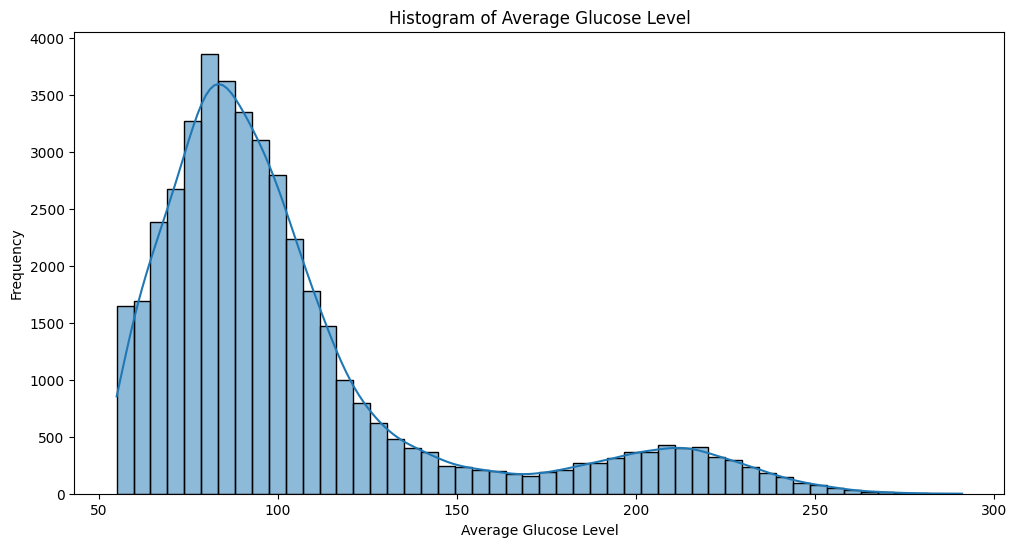

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df["Avg_Glucose_Level"],bins=50, kde=True)
plt.title("Histogram of Average Glucose Level")
plt.xlabel("Average Glucose Level")
plt.ylabel("Frequency")
plt.show()

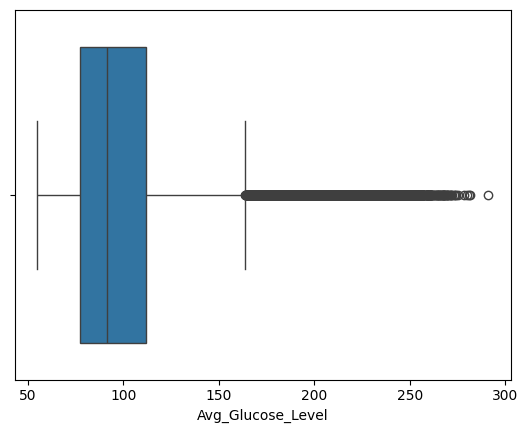

In [28]:
sns.boxplot(x=df["Avg_Glucose_Level"])
plt.show()

In [29]:
upper_limit = df["Avg_Glucose_Level"].quantile(0.99)
df["Avg_Glucose_Level"] = df["Avg_Glucose_Level"].clip(upper=upper_limit)

In [30]:
df["Log_Glucose"] = np.log1p(df["Avg_Glucose_Level"])

In [31]:
def categorize_gulcose(level):
    if level < 70:
        return 'LOW'
    elif 70 <= level < 100:
        return 'NORMAL'
    elif 100 <= level < 126:
        return 'PREDIABETES'
    else:
        return 'DIABETES'
df["gulcose_category"] = df['Avg_Glucose_Level'].apply(categorize_gulcose)

In [32]:
df["gulcose_category"].value_counts()

,count
gulcose_category,
NORMAL,20961
PREDIABETES,8553
DIABETES,7714
LOW,6172


In [33]:
df["BMI"].value_counts()

,count
BMI,
27.7,271
27.6,267
26.8,266
26.1,265
27.1,260
...,...
71.8,1
60.6,1
65.7,1


In [34]:
df["BMI"].isnull().sum()

np.int64(1462)

In [35]:
df["BMI"] = df["BMI"].fillna (df["BMI"].median())

In [36]:
df["Smoking_Status"].mode()

,Smoking_Status
0,never smoked


In [37]:
df["Smoking_Status"].value_counts()

,count
Smoking_Status,
never smoked,16053
formerly smoked,7493
smokes,6562


In [38]:
df["Smoking_Status"] = df["Smoking_Status"].fillna (df["Smoking_Status"].mode()[0])

In [39]:
df["Stroke"].value_counts()

,count
Stroke,
0,42617
1,783


In [40]:
df.columns.tolist()

['ID',
 'Gender',
 'Age',
 'Hypertension',
 'Heart_Disease',
 'Ever_Married',
 'Work_Type',
 'Residence_Type',
 'Avg_Glucose_Level',
 'BMI',
 'Smoking_Status',
 'Stroke',
 'Age_Months',
 'Log_Glucose',
 'gulcose_category']

In [41]:
df = pd.get_dummies(df, columns=[
    'Gender', 'Ever_Married', 'Work_Type', 'Residence_Type', 'Smoking_Status'
], drop_first=True)

In [49]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE
import joblib

In [50]:
LE = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LE.fit_transform(df[col])

In [51]:
X = df.drop('Stroke', axis=1)
y = df['Stroke']

In [52]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [54]:
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    max_depth=4,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

In [55]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    xgb_model, X_res, y_res,
    cv=skf,
    scoring='roc_auc'
)

print("CV ROC AUC scores:", cv_scores)
print("Mean CV ROC AUC:", np.mean(cv_scores))

CV ROC AUC scores: [0.98368558 0.98315219 0.9835838  0.98287799 0.98452879]
Mean CV ROC AUC: 0.9835656721592387


In [56]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [57]:
y_pred = xgb_model.predict(X_test)
y_probs = xgb_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      8524
           1       0.92      0.94      0.93      8523

    accuracy                           0.93     17047
   macro avg       0.93      0.93      0.93     17047
weighted avg       0.93      0.93      0.93     17047

Confusion Matrix:
 [[7875  649]
 [ 531 7992]]
ROC AUC Score: 0.9838421106704782


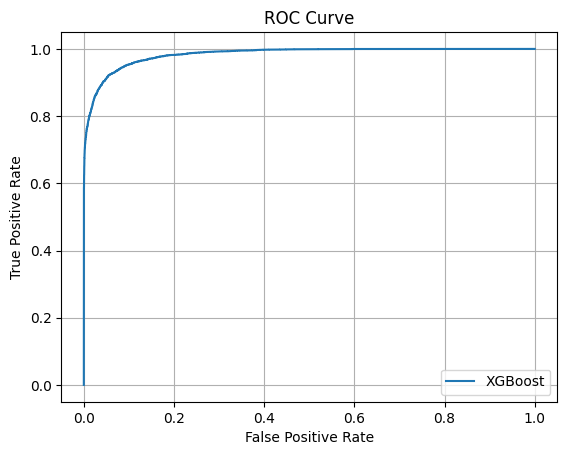

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

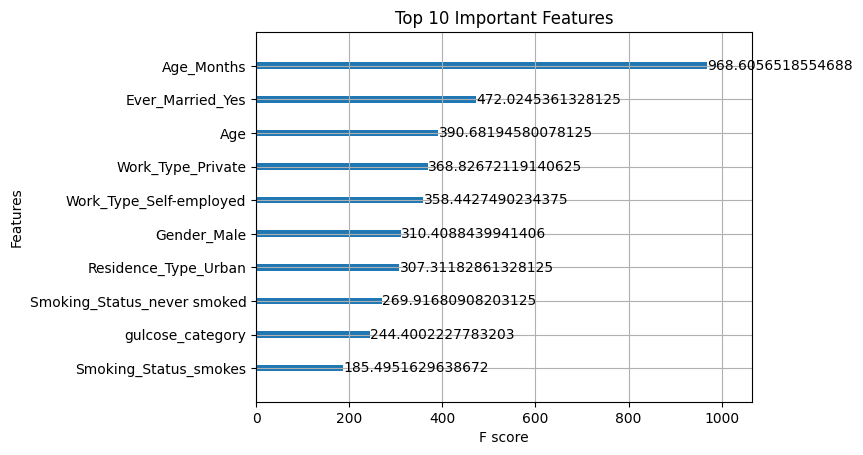

In [59]:
plt.figure(figsize=(10,6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Important Features")
plt.show()


In [1]:
joblib.dump(xgb_model, 'xgboost_stroke_model.pkl')
print("Model saved!")

NameError: name 'joblib' is not defined

In [61]:
!streamlit run app.py

/bin/bash: line 1: streamlit: command not found
